# Correlation Notebook


Evaluating correlaiton between bitcoin price fluctuations and and tweet sentiments.

Bitoin prices are obserevd over different shifts of bitcoin price and sentiments, assuming the sentiments effect the bitcoin price over some delay and not immeditaley.

In [4]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
from datetime import datetime,timedelta
import pandas as pd

import seaborn as sns; sns.set_theme()

In [ ]:

files = [f for f in glob('/content/drive/MyDrive/fyp/sentiments/*.csv')]

df_price = pd.read_csv('/content/drive/MyDrive/fyp/btc-usd-new.csv')
df_price['time'] = pd.to_datetime(df_price['time'])


df_final = pd.DataFrame({'time': pd.Series(dtype='datetime64[ns, UTC]'),
                   'compound': pd.Series(dtype='float'),
                   'neg': pd.Series(dtype='float'),
                   'pos': pd.Series(dtype='float'),
                   'weighted_comp': pd.Series(dtype='float'),
                   'weighted_neg': pd.Series(dtype='float'),
                   'weighted_pos': pd.Series(dtype='float'),
                   'count': pd.Series(dtype='float'),
                   'open': pd.Series(dtype='float')})

df_final.index = df_final.time
df_final = df_final.drop('time',axis =1)


i = 0
for filex in files:
    print(i)
    df = pd.read_csv(filex)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['weighted_comp'] = 1/(1 + np.exp(-((df['compound']*df['likes']) + (df['compound']*df['retweets']) + df['compound'])))
    df['weighted_pos'] = 1/(1 + np.exp(-((df['pos']*df['likes']) + (df['pos']*df['retweets']) + df['pos'])))
    df['weighted_neg'] = 1/(1 + np.exp(-((df['neg']*df['likes']) + (df['neg']*df['retweets']) + df['neg'])))
    #df['weighted_comp'] = 1/(1 + np.exp(-((df['compound']*df['likes']) + (df['compound']*df['followers_count'])))) # use this if all the follower count have been extracted
    df = df.resample('H', on='timestamp').agg({'compound':'mean','neu':'count','pos':'mean','neg':'mean','timestamp':'count','weighted_comp':'mean','weighted_neg':'mean','weighted_pos':'mean'}).rename(columns={"timestamp": "count"})
    df.index = df.index.astype('datetime64[ns, UTC]')



    curr_date = filex.replace('/content/drive/MyDrive/fyp/sentiments/sent_','').replace('.csv','')
    min_date = datetime.strptime(curr_date, "%Y-%m-%d") - timedelta(days=1)
    max_date = datetime.strptime(curr_date, "%Y-%m-%d")



    df_price_temp = df_price.loc[(df_price['time']>=min_date) & (df_price['time']<max_date)]
    df_price_temp.index = df_price_temp['time']
    df_price_temp.index = df_price_temp.index.astype('datetime64[ns, UTC]')

    df_final = pd.concat([df_final,df_price_temp[['open']].join(df[['compound', 'pos', 'neg', 'count', 'weighted_comp', 'weighted_neg', 'weighted_pos']])])
    i+=1
  #add code to fill NaN values with their mean

In [ ]:
df_final.tail()

,compound,neg,pos,weighted_comp,weighted_neg,weighted_pos,count,open
time,,,,,,,,
2022-05-28 20:00:00+00:00,0.114074,0.064674,0.114356,0.555586,0.547263,0.579577,1504.0,28994.84
2022-05-28 21:00:00+00:00,0.120757,0.063181,0.117192,0.555153,0.541730,0.577992,1429.0,29001.00
2022-05-28 22:00:00+00:00,0.140109,0.062742,0.114386,0.571764,0.546529,0.586936,1293.0,28991.50
2022-05-28 23:00:00+00:00,0.160179,0.060827,0.126162,0.568075,0.537649,0.578543,1305.0,28969.87
2022-06-01 00:00:00+00:00,0.129303,0.070754,0.124366,0.565354,0.545701,0.584921,1710.0,31784.18


In [ ]:
df_final = (df_final.ffill()+df_final.bfill())/2
df_final = df_final.sort_index()
df_final.to_csv('/content/drive/MyDrive/fyp/btc-sent-f2.csv')
df = df_final

df = df.astype('float')
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/fyp/btc-sent-f2.csv')
#df = pd.read_csv('/content/drive/MyDrive/fyp/btc-sent-f4.csv')

df.time = pd.to_datetime(df.time)
df = df.set_index('time')

SHIFT = 7
df_shift = df.copy()
df_shift.open = df_shift.open.shift(SHIFT)
df_shift = df_shift[SHIFT:]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_shift) 
column_names = ["compound",	"neg",	"pos",	"weighted_comp",	"weighted_neg",	"weighted_pos",	"count",	"open"]
df_scaled = pd.DataFrame(scaled)
df_scaled.columns = column_names

df_corr = df_scaled.corr(method="pearson")

df_corrP = pd.DataFrame(df_corr)


df_corrF = df_corrP[['open_methode_2']]

df_corrF['open_shift_7'] = df_corrP['open']
df_corr['open_methode_2']  = df_corrP['open_methode_2'] 



# CORRELATION MATRIX

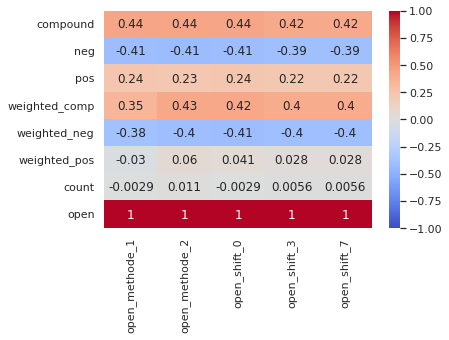

In [117]:
ax = sns.heatmap(df_corrF, annot=True,vmin=-1, cmap="coolwarm"	)

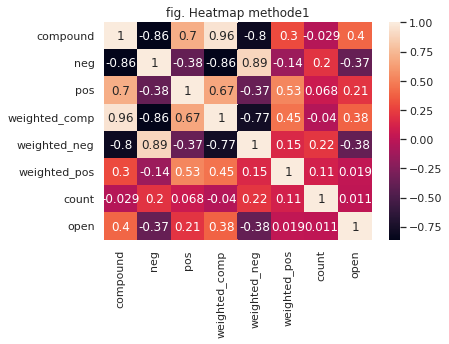

In [56]:
f2 7

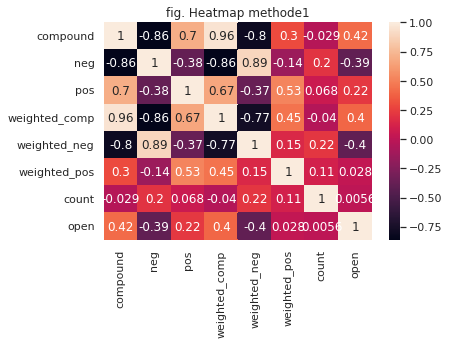

In [53]:
f2 3

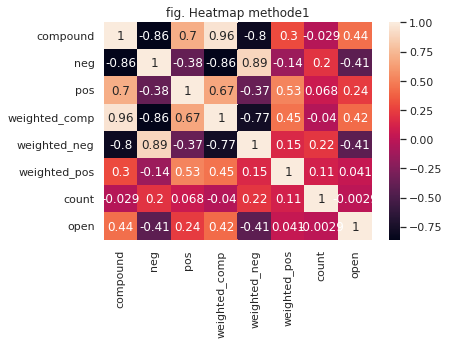

In [44]:
f2 0

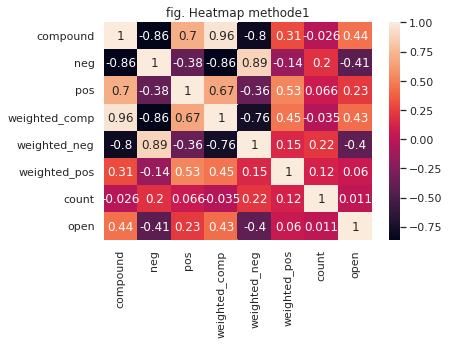

In [40]:

f4

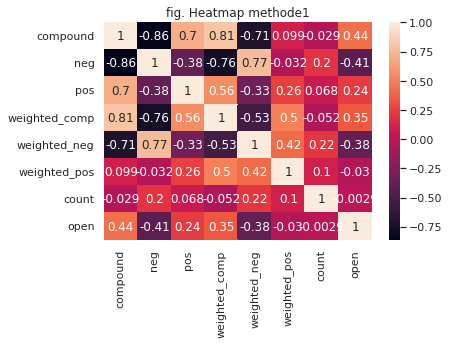

In [36]:
new